# PANDAS et DATA VIZ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline

Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser1=pd.Series([70,8,300,1200],index=["France", "Suisse", "USA", "Chine"])

In [3]:
ser1[(ser1>400) | (ser1<60)]

Suisse       8
Chine     1200
dtype: int64

In [4]:
ser1[(ser1<400) & (ser1>60)]

France     70
USA       300
dtype: int64

In [5]:
ser1.name="Populations"
ser1.index.name="Pays"
ser1

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui.


In [6]:
import datetime

In [7]:
datetime.date.today()

datetime.date(2018, 2, 2)

In [8]:
datetime.datetime.now()

datetime.datetime(2018, 2, 2, 9, 37, 43, 363968)

In [9]:
dates=pd.date_range("2017-10-01",datetime.datetime.now(),freq="D")

In [10]:
ser_dates=pd.Series(np.random.randn(len(dates)),index=dates)

In [11]:
ser_dates

2017-10-01    2.029679
2017-10-02    0.257404
2017-10-03   -0.278918
2017-10-04    1.366696
2017-10-05   -0.491208
2017-10-06    0.517997
2017-10-07    1.158537
2017-10-08    0.396635
2017-10-09   -1.462447
2017-10-10    2.419262
2017-10-11    0.456482
2017-10-12   -0.060258
2017-10-13   -1.042621
2017-10-14   -2.007509
2017-10-15    1.015905
2017-10-16    1.027588
2017-10-17   -0.844778
2017-10-18   -1.497644
2017-10-19   -0.024310
2017-10-20   -1.627061
2017-10-21    0.895816
2017-10-22   -1.368410
2017-10-23    0.061425
2017-10-24    0.339628
2017-10-25   -0.038246
2017-10-26    0.357642
2017-10-27    1.232773
2017-10-28    0.880072
2017-10-29    1.778685
2017-10-30   -1.268176
                ...   
2018-01-04    1.366682
2018-01-05   -1.594135
2018-01-06   -0.826086
2018-01-07   -0.681988
2018-01-08   -0.566144
2018-01-09    0.154509
2018-01-10   -0.840427
2018-01-11   -1.921971
2018-01-12   -1.522656
2018-01-13   -1.113169
2018-01-14    0.977234
2018-01-15    0.972250
2018-01-16 

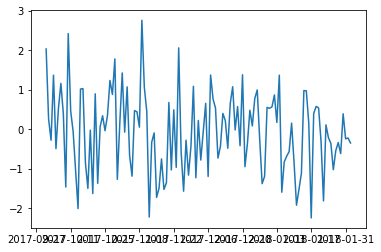

In [12]:
plt.plot(ser_dates)

Récupérez les données de Wikipédia sur les résultats de NBA et obtenir les statistiques descriptives pour les variables quantitatives.
On utilisera plutôt Chrome ou Firefox pour ce type de tâches (éviter IE)


In [23]:
import webbrowser
url='https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records'
webbrowser.open(url)

True

In [24]:
frame_nba= pd.read_clipboard()

In [25]:
frame_nba.head()

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
0,1,San Antonio Spurs,"2,067","1,247",0.624,1976–77,"3,314",Southwest
1,2,Los Angeles Lakers,"3,261","2,190",0.598,1948–49,"5,451",Pacific
2,3,Boston Celtics,"3,274","2,286",0.589,1946–47,"5,560",Atlantic
3,4,Phoenix Suns,"2,146","1,824",0.541,1968–69,"3,970",Pacific
4,5,Oklahoma City Thunder,"2,186","1,866",0.539,1967–68,"4,052",Northwest


In [26]:
frame_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null object
Lost                30 non-null object
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null object
Division            30 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [27]:
frame_nba.describe(include="all")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
count,30.000000,30,30,30,30.000000,30,30,30
unique,NaN,30,30,28,NaN,16,21,6
top,NaN,Indiana Pacers,952,"1,945",NaN,1976–77,"3,314",Southeast
freq,NaN,1,1,2,NaN,4,3,5
mean,15.500000,NaN,NaN,NaN,0.494300,NaN,NaN,NaN
std,8.803408,NaN,NaN,NaN,0.055334,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.391000,NaN,NaN,NaN
25%,8.250000,NaN,NaN,NaN,0.459250,NaN,NaN,NaN
50%,15.500000,NaN,NaN,NaN,0.494500,NaN,NaN,NaN
75%,22.750000,NaN,NaN,NaN,0.521500,NaN,NaN,NaN


Transformation des données

In [28]:
def transformation_nba(frame):
    """Cette fonction permet de nettoyer les données NBA"""
    for var in frame.columns:
        if frame[var].dtype==object:
            frame[var]=frame[var].str.replace(",","").astype(int,errors="ignore")
    return frame


In [29]:
frame_nba2=transformation_nba(frame_nba)

In [30]:
frame_nba2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
Rank                30 non-null int64
Team                30 non-null object
Won                 30 non-null int32
Lost                30 non-null int32
Pct.                30 non-null float64
First NBA Season    30 non-null object
Total Games         30 non-null int32
Division            30 non-null object
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 1.6+ KB


In [31]:
frame_nba2.corr()

,Rank,Won,Lost,Pct.,Total Games
Rank,1.000000,-0.586385,-0.082124,-0.967006,-0.370373
Won,-0.586385,1.000000,0.823484,0.600994,0.961722
Lost,-0.082124,0.823484,1.000000,0.072293,0.947429
Pct.,-0.967006,0.600994,0.072293,1.000000,0.373863
Total Games,-0.370373,0.961722,0.947429,0.373863,1.000000


Trier les données NBA en fonction de la variable Won

In [32]:
frame_nba2.sort_values("Won")

,Rank,Team,Won,Lost,Pct.,First NBA Season,Total Games,Division
21,22,New Orleans Pelicans,562,652,0.463,2002–03[a],1214,Southwest
26,27,Memphis Grizzlies,737,1019,0.420,1995–96,1756,Southwest
24,25,Toronto Raptors,785,971,0.447,1995–96,1756,Atlantic
29,30,Minnesota Timberwolves,878,1370,0.391,1989–90,2248,Northwest
25,26,Charlotte Hornets,952,1214,0.440,1988–89[a],2166,Southeast
17,18,Orlando Magic,1091,1157,0.485,1989–90,2248,Southeast
9,10,Miami Heat,1211,1119,0.520,1988–89,2330,Southeast
27,28,Brooklyn Nets,1380,1934,0.416,1976–77,3314,Atlantic
12,13,Dallas Mavericks,1515,1471,0.507,1980–81,2986,Southwest
28,29,Los Angeles Clippers,1520,2286,0.399,1970–71,3806,Pacific


Trier les données NBA en fonction des variables Won et division (division de A à Z et Won décroissant)

In [33]:
frame_nba2=frame_nba2.sort_values(by=["Division","Won"],ascending=[True,False])

In [34]:
# on ajoute une donnée manquantes
frame_nba2["Lost"][4]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
frame_nba2["Lost"].fillna(frame_nba2["Lost"].mean())

2     2286.000000
10    2632.000000
15    2825.000000
27    1934.000000
24     971.000000
16    2797.000000
7     1977.000000
11    1945.000000
20    2027.000000
14    1665.000000
4     1885.482759
6     1774.000000
5     1612.000000
18    1711.000000
29    1370.000000
1     2190.000000
19    2899.000000
22    2955.000000
3     1824.000000
28    2286.000000
13    2695.000000
23    2480.000000
9     1119.000000
17    1157.000000
25    1214.000000
8     1945.000000
0     1247.000000
12    1471.000000
26    1019.000000
21     652.000000
Name: Lost, dtype: float64

### Importation de données

In [36]:
frame_ventes=pd.read_csv("../data/demo_ventes.csv",sep=";")

In [37]:
frame_ventes.shape

(15, 4)

Récupérer des données web

In [38]:
nba3=pd.read_html("https://en.wikipedia.org/wiki/List_of_all-time_NBA_win-loss_records",
                 header="infer")

In [39]:
frame_nba3=nba3[1]

In [40]:
frame_bank= pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")[0]

In [41]:
frame_bank.to_csv("../data/bank.csv",sep=";",decimal=",")

Fichier Excel

In [42]:
#Approche 1
frame_excel=pd.read_excel("../data/excel-data.xlsx",sheetname=0)

In [43]:
#approche 2
objet_excel=pd.ExcelFile("../data/excel-data.xlsx")
frame_excel2=objet_excel.parse(objet_excel.sheet_names[0])

In [44]:
dico_excel={}
for feuilles in objet_excel.sheet_names:
    dico_excel[feuilles]=objet_excel.parse(feuilles)

In [45]:
type(dico_excel["sheet1"])

pandas.core.frame.DataFrame

Récupérer une base SQL

In [46]:
from sqlalchemy import create_engine

In [47]:
engine=create_engine("sqlite:///../data/database.sqlite")

In [48]:
engine.table_names()

['Aliases', 'EmailReceivers', 'Emails', 'Persons']

In [49]:
frame_sql=pd.read_sql_query("select * from Emails",con=engine)

In [50]:
frame_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7945 non-null object
MetadataTo                      7945 non-null object
MetadataFrom                    7945 non-null object
SenderPersonId                  7945 non-null object
MetadataDateSent                7945 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                7945 non-null object
ExtractedTo                     7945 non-null object
ExtractedFrom                   7945 non-null object
ExtractedCc                     7945 non-null object
ExtractedDateSent               7945 non-null object
ExtractedCaseNumber             7945 non-null 

Jointure avec pandas

In [51]:
frame_credit1=pd.read_table("../data/credit1.txt")
frame_credit2=pd.read_excel("../data/credit2.xlsx")

In [52]:
frame_credit1.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card
0,24,3,10,229,2,40,13,0,5409,0,...,17,F,F,F,F,90,F,F,F,F
1,12,2,12,8,1,47,5,2,5477,0,...,22,F,F,F,F,260,F,F,F,F
2,36,0,0,0,0,35,31,0,5507,0,...,27,F,F,T,T,0,F,F,T,F
3,0,0,0,0,0,45,-3,0,8,0,...,51,F,F,F,F,0,F,T,F,F
4,48,0,0,0,0,13,39,0,158,0,...,8,F,F,F,F,0,F,F,T,F


In [53]:
frame_credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [54]:
frame_credit=pd.merge(frame_credit1,frame_credit2,on="Customer_ID",how="inner")

In [55]:
frame_credit.describe()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,Members_Within_Household,Number_of_Call_Center_Contacts,Weeks_Since_Last_Offer,Annual_value,Age,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,24.678000,2.343000,4.071500,80.667500,1.248500,39.495500,17.910500,1.114500,45405.117500,0.004500,3.705500,7.951000,25.841500,181.740000,39.495500,11.291500,10.939500,32.582500,54.905500,50069.633000
std,15.026817,6.368016,6.401553,153.086726,3.637769,12.076005,13.583068,1.388652,25900.767333,0.066948,1.779425,3.588877,15.017395,236.091809,12.076005,10.614559,3.613083,8.951271,9.661068,11510.929488
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-7.000000,0.000000,8.000000,0.000000,1.000000,0.000000,1.000000,0.000000,10.000000,0.000000,2.000000,9.000000,19.000000,17418.000000
25%,12.000000,0.000000,0.000000,0.000000,0.000000,31.000000,8.000000,0.000000,24628.750000,0.000000,2.000000,8.000000,13.000000,0.000000,31.000000,2.000000,8.000000,27.000000,49.000000,42562.750000
50%,24.000000,0.000000,0.000000,0.000000,0.000000,39.000000,18.000000,1.000000,45300.000000,0.000000,4.000000,9.000000,25.000000,100.000000,39.000000,10.000000,11.000000,32.000000,56.000000,49742.500000
75%,36.000000,2.000000,9.000000,119.000000,1.000000,46.000000,29.000000,2.000000,67063.250000,0.000000,5.000000,10.000000,39.000000,230.000000,46.000000,17.000000,14.000000,38.000000,62.000000,57415.000000
max,48.000000,56.000000,36.000000,1208.000000,29.000000,83.000000,41.000000,7.000000,97651.000000,1.000000,7.000000,11.000000,52.000000,1680.000000,83.000000,57.000000,22.000000,66.000000,80.000000,80874.000000


In [56]:
mat_corr=frame_credit.corr()

In [57]:
mat_corr

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,Members_Within_Household,Number_of_Call_Center_Contacts,Weeks_Since_Last_Offer,Annual_value,Age,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income
Months_as_a_Customer,1.000000,0.105470,0.199877,0.168463,0.133308,-0.013431,0.974170,0.001744,0.021141,-0.003034,0.016676,0.023101,-0.006201,0.086369,-0.013431,-0.011815,-0.017930,0.011790,-0.003404,-0.065827
Number_of_Products,0.105470,1.000000,0.779731,0.677067,0.917313,-0.006953,0.102982,-0.000766,0.078697,-0.011836,0.020088,-0.005831,-0.026057,0.808728,-0.006953,-0.005040,0.020253,-0.052881,0.042468,-0.035771
RFM_Score,0.199877,0.779731,1.000000,0.811204,0.823744,-0.006490,0.194995,0.023727,0.043182,-0.018260,0.042340,0.006728,-0.020447,0.644897,-0.006490,-0.004820,0.007346,-0.018144,0.014871,-0.051129
Average_Balance_Feed_Index,0.168463,0.677067,0.811204,1.000000,0.682285,-0.022144,0.166014,0.027460,0.012468,0.002831,0.014165,-0.009015,-0.026274,0.564019,-0.022144,-0.019009,0.009012,-0.007836,0.004861,-0.048886
Number_of_Transactions,0.133308,0.917313,0.823744,0.682285,1.000000,-0.003180,0.126495,-0.000387,0.064598,-0.012810,0.015716,-0.004853,-0.007474,0.742042,-0.003180,-0.003587,0.018348,-0.049583,0.040737,-0.047174
Personal_Debt_to_Equity_Ratio,-0.013431,-0.006953,-0.006490,-0.022144,-0.003180,1.000000,-0.013267,0.008309,-0.013669,0.000953,0.188681,-0.019085,0.026197,-0.000739,1.000000,0.954742,-0.017783,-0.008544,0.017334,-0.022790
Months_Current_Account,0.974170,0.102982,0.194995,0.166014,0.126495,-0.013267,1.000000,-0.008288,0.017818,-0.007258,0.014701,0.022630,-0.002301,0.078456,-0.013267,-0.013236,-0.017704,0.016422,-0.008032,-0.064207
Number_of_Loan_Accounts,0.001744,-0.000766,0.023727,0.027460,-0.000387,0.008309,-0.008288,1.000000,-0.005793,-0.021688,0.042806,-0.011822,-0.011267,0.587563,0.008309,0.009783,0.037175,0.093151,-0.095471,0.021943
Customer_ID,0.021141,0.078697,0.043182,0.012468,0.064598,-0.013669,0.017818,-0.005793,1.000000,0.046226,-0.005724,0.002177,-0.003725,0.060273,-0.013669,-0.018231,0.028895,-0.006125,-0.002319,0.017105
Has_Bad_Payment_Record,-0.003034,-0.011836,-0.018260,0.002831,-0.012810,0.000953,-0.007258,-0.021688,0.046226,1.000000,0.006931,-0.119841,0.006183,-0.022334,0.000953,0.005193,-0.019555,0.011484,-0.002436,0.019428


In [58]:
#on recherche toutes les duplications
frame_credit.duplicated("Customer_ID").sum()

0

### DISCRETISATION

In [59]:
#10 intervalles de taille égale
frame_credit["Income_disc"]=pd.cut(frame_credit["Income"],10,labels=range(1,11))
#intervalles sur mesure
frame_credit["Income_disc2"]=pd.cut(frame_credit["Income"],[frame_credit["Income"].min(),30000,
                                                           50000,65000, 
                                                            frame_credit["Income"].max()])
#intervalle de fréquence égales
frame_credit["Income_disc3"]=pd.qcut(frame_credit["Income"],10)


In [60]:
frame_credit["Income_disc3"].nunique()

10

In [61]:
frame_credit["Income_disc"].value_counts()

5     415
6     395
4     349
7     297
8     225
3     127
9      78
2      52
10     38
1      24
Name: Income_disc, dtype: int64

### Utilisation du groupby

In [62]:
group_credit=frame_credit.groupby("Income_disc2")

In [63]:
group_credit["Age"].agg(["mean","std"])

,mean,std
Income_disc2,,
"(17418, 30000]",44.229730,10.450860
"(30000, 50000]",39.061975,12.324023
"(50000, 65000]",40.646409,11.743895
"(65000, 80874]",36.520161,11.706585


## Data Visualisation

In [64]:
import seaborn as sns

In [65]:
y=np.random.randn(1000)

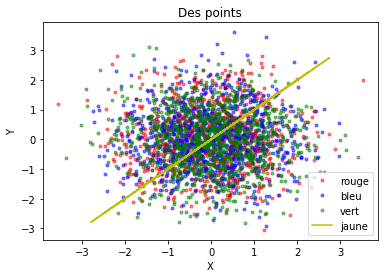

In [66]:
#on construit un graphique en plusieurs étapes
plt.plot(np.random.randn(1000),np.random.randn(1000),"r.",label="rouge",alpha=0.5)
plt.plot(np.random.randn(1000),np.random.randn(1000),"b.",label="bleu",alpha=0.5)
plt.plot(np.random.randn(1000),np.random.randn(1000),"g.",label="vert",alpha=0.5)
plt.plot(y,y,"y-",label="jaune")
plt.title("Des points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=0)

Générez un histogramme à partir de 2 échantillons de 10000 observations sur 100 intervalles


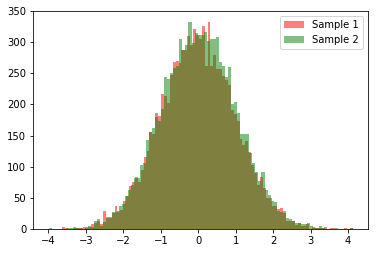

In [67]:
hist_int1=plt.hist(np.random.randn(10000),bins=100,label="Sample 1",alpha=0.5,
                   color="red",histtype="bar")
hist_int2=plt.hist(np.random.randn(10000),bins=100,label="Sample 2", alpha=0.5,
                   color="green",histtype="bar")
plt.legend()

{'boxes': [<matplotlib.lines.Line2D at 0x199f44ef0f0>],
 'caps': [<matplotlib.lines.Line2D at 0x199f44f8be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x199f44cdf28>],
 'means': [<matplotlib.lines.Line2D at 0x199f44cd978>],
 'medians': [<matplotlib.lines.Line2D at 0x199f44cd358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x199f44efbe0>,
  <matplotlib.lines.Line2D at 0x199f44efd68>]}

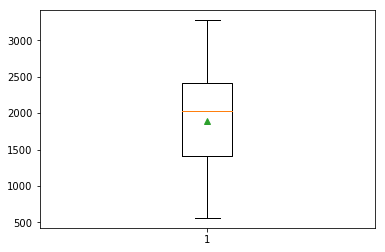

In [68]:
plt.boxplot(frame_nba2["Won"],showmeans=True)

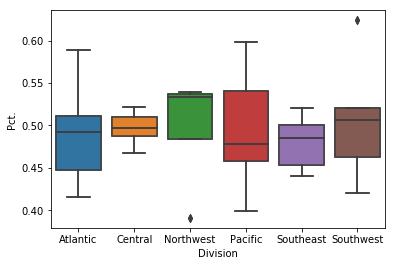

In [69]:
sns.boxplot(frame_nba2["Division"],frame_nba2["Pct."])
sns.boxplot("Division","Pct.",data=frame_nba2)


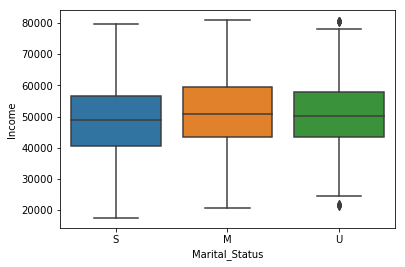

In [70]:
sns.boxplot(frame_credit["Marital_Status"],frame_credit["Income"])

## Etude des données Californie

In [71]:
frame_housing=pd.read_csv("../data/housing.csv")

In [72]:
frame_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [73]:
#transformation de l'image en array
from scipy.misc import imread
image=imread("../data/california.png")

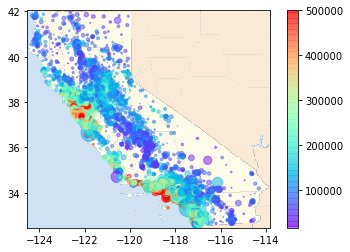

In [74]:
#construction du graphique
plt.scatter("longitude","latitude",data=frame_housing, s=frame_housing["population"]/100,
           c="median_house_value",cmap=plt.get_cmap("rainbow"),alpha=0.5)
plt.colorbar()
plt.imshow(image,extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5)

plt.savefig("prix_calif.png")